<a href="https://colab.research.google.com/github/MUKESHV17/Predictive-Analysis-with-Decision-Trees/blob/main/Predictive_Analysis_with_Decision_Trees.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files
files.upload()



Saving Heart_disease_cleveland_new.csv to Heart_disease_cleveland_new.csv


{'Heart_disease_cleveland_new.csv': b'\xef\xbb\xbfage,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target\r\n63,1,0,145,233,1,2,150,0,2.3,2,0,2,0\r\n67,1,3,160,286,0,2,108,1,1.5,1,3,1,1\r\n67,1,3,120,229,0,2,129,1,2.6,1,2,3,1\r\n37,1,2,130,250,0,0,187,0,3.5,2,0,1,0\r\n41,0,1,130,204,0,2,172,0,1.4,0,0,1,0\r\n56,1,1,120,236,0,0,178,0,0.8,0,0,1,0\r\n62,0,3,140,268,0,2,160,0,3.6,2,2,1,1\r\n57,0,3,120,354,0,0,163,1,0.6,0,0,1,0\r\n63,1,3,130,254,0,2,147,0,1.4,1,1,3,1\r\n53,1,3,140,203,1,2,155,1,3.1,2,0,3,1\r\n57,1,3,140,192,0,0,148,0,0.4,1,0,2,0\r\n56,0,1,140,294,0,2,153,0,1.3,1,0,1,0\r\n56,1,2,130,256,1,2,142,1,0.6,1,1,2,1\r\n44,1,1,120,263,0,0,173,0,0,0,0,3,0\r\n52,1,2,172,199,1,0,162,0,0.5,0,0,3,0\r\n57,1,2,150,168,0,0,174,0,1.6,0,0,1,0\r\n48,1,1,110,229,0,0,168,0,1,2,0,3,1\r\n54,1,3,140,239,0,0,160,0,1.2,0,0,1,0\r\n48,0,2,130,275,0,0,139,0,0.2,0,0,1,0\r\n49,1,1,130,266,0,0,171,0,0.6,0,0,1,0\r\n64,1,0,110,211,0,2,144,1,1.8,1,0,1,0\r\n58,0,0,150,283,1,2,162,0,1,0,0,

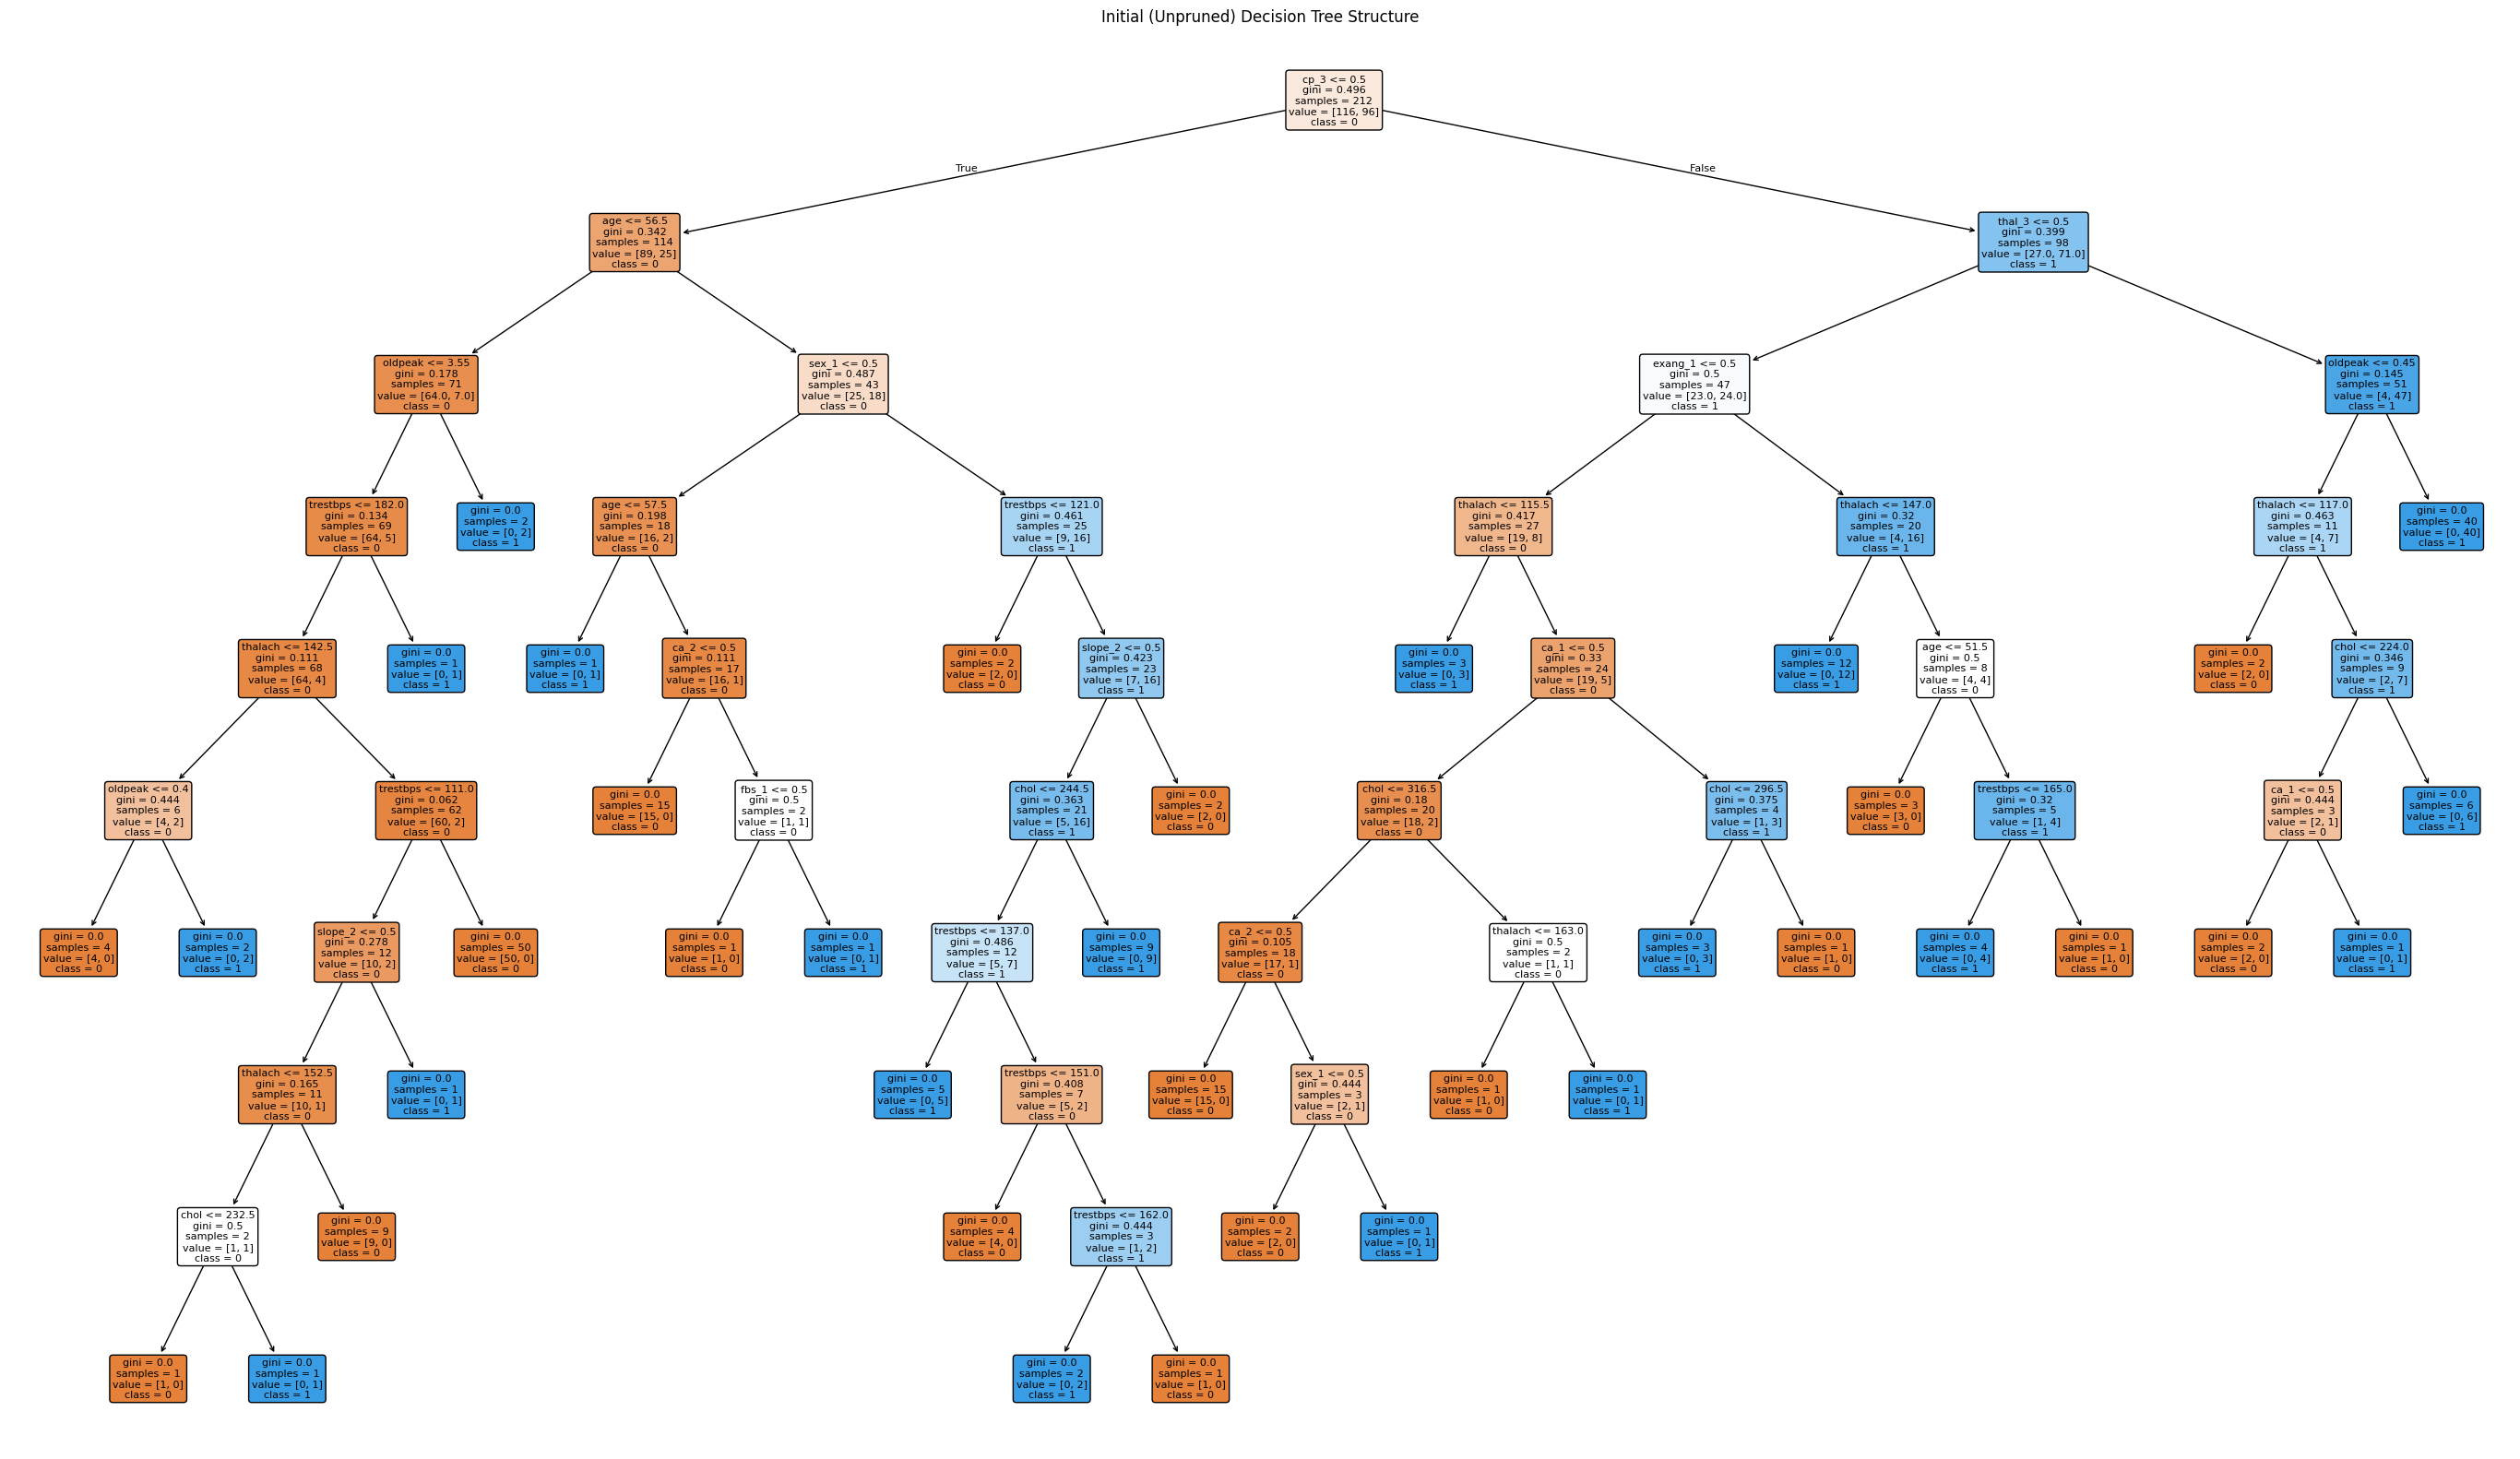

Initial (Unpruned) Decision Tree visualization saved as unpruned_decision_tree.png


In [10]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

# Get feature names and class names for interpretability
feature_names = X_encoded.columns.tolist()
class_names = [str(cls) for cls in dt_classifier.classes_]

plt.figure(figsize=(35, 20)) # Adjust size for potentially larger tree
plot_tree(dt_classifier,
          feature_names=feature_names,
          class_names=class_names,
          filled=True,
          rounded=True,
          fontsize=8)
plt.title("Initial (Unpruned) Decision Tree Structure")
plt.savefig("unpruned_decision_tree.png", dpi=300)
plt.show()

print("Initial (Unpruned) Decision Tree visualization saved as unpruned_decision_tree.png")

In [2]:
import pandas as pd

df = pd.read_csv('Heart_disease_cleveland_new.csv')

print("First 5 rows of the DataFrame:")
print(df.head())

print("\nShape of the DataFrame:")
print(df.shape)

print("\nData types of each column:")
df.info()

print("\nSum of missing values for each column:")
print(df.isnull().sum())

First 5 rows of the DataFrame:
   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   0       145   233    1        2      150      0      2.3      2   
1   67    1   3       160   286    0        2      108      1      1.5      1   
2   67    1   3       120   229    0        2      129      1      2.6      1   
3   37    1   2       130   250    0        0      187      0      3.5      2   
4   41    0   1       130   204    0        2      172      0      1.4      0   

   ca  thal  target  
0   0     2       0  
1   3     1       1  
2   2     3       1  
3   0     1       0  
4   0     1       0  

Shape of the DataFrame:
(303, 14)

Data types of each column:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-nul

In [3]:
from sklearn.model_selection import train_test_split
import pandas as pd

# 1. Separate features (X) from the target variable ('target')
X = df.drop('target', axis=1)
y = df['target']

# 2. Identify categorical columns
categorical_cols = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']

# 3. Apply one-hot encoding to categorical columns in X
X_encoded = pd.get_dummies(X, columns=categorical_cols, drop_first=True)

# 5. Split the preprocessed data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.3, random_state=42)

print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)
print("\nFirst 5 rows of X_encoded (after one-hot encoding):\n", X_encoded.head())

Shape of X_train: (212, 20)
Shape of X_test: (91, 20)
Shape of y_train: (212,)
Shape of y_test: (91,)

First 5 rows of X_encoded (after one-hot encoding):
    age  trestbps  chol  thalach  oldpeak  sex_1   cp_1   cp_2   cp_3  fbs_1  \
0   63       145   233      150      2.3   True  False  False  False   True   
1   67       160   286      108      1.5   True  False  False   True  False   
2   67       120   229      129      2.6   True  False  False   True  False   
3   37       130   250      187      3.5   True  False   True  False  False   
4   41       130   204      172      1.4  False   True  False  False  False   

   restecg_1  restecg_2  exang_1  slope_1  slope_2   ca_1   ca_2   ca_3  \
0      False       True    False    False     True  False  False  False   
1      False       True     True     True    False  False  False   True   
2      False       True     True     True    False  False   True  False   
3      False      False    False    False     True  False  False  Fal

In [4]:
from sklearn.tree import DecisionTreeClassifier

# Instantiate a DecisionTreeClassifier object without any pruning parameters
dt_classifier = DecisionTreeClassifier(random_state=42)

# Fit the instantiated DecisionTreeClassifier model to the training data
dt_classifier.fit(X_train, y_train)

print("Initial Decision Tree Classifier trained successfully.")

Initial Decision Tree Classifier trained successfully.


In [5]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# 1. Use the trained dt_classifier to make predictions on the X_test data.
y_pred = dt_classifier.predict(X_test)

# 3. Calculate the accuracy, precision, recall, and F1-score
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-score: {f1:.4f}")

# 4. Calculate and print the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:\n", conf_matrix)

Accuracy: 0.7473
Precision: 0.7273
Recall: 0.7442
F1-score: 0.7356

Confusion Matrix:
 [[36 12]
 [11 32]]


In [6]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# 1. Instantiate a new DecisionTreeClassifier object with pre-pruning parameters
# Experimenting with max_depth=5, min_samples_split=10, min_samples_leaf=5
dt_pruned_classifier = DecisionTreeClassifier(max_depth=5, min_samples_split=10, min_samples_leaf=5, random_state=42)

# 2. Fit the pre-pruned Decision Tree Classifier to the training data
dt_pruned_classifier.fit(X_train, y_train)

# 3. Use the trained pre-pruned classifier to make predictions on the test data
y_pred_pruned = dt_pruned_classifier.predict(X_test)

# 4. Calculate and print the accuracy, precision, recall, and F1-score of the pre-pruned model
accuracy_pruned = accuracy_score(y_test, y_pred_pruned)
precision_pruned = precision_score(y_test, y_pred_pruned)
recall_pruned = recall_score(y_test, y_pred_pruned)
f1_pruned = f1_score(y_test, y_pred_pruned)

print(f"Pre-pruned Model Accuracy: {accuracy_pruned:.4f}")
print(f"Pre-pruned Model Precision: {precision_pruned:.4f}")
print(f"Pre-pruned Model Recall: {recall_pruned:.4f}")
print(f"Pre-pruned Model F1-score: {f1_pruned:.4f}")

# 5. Calculate and print the confusion matrix for the pre-pruned model
conf_matrix_pruned = confusion_matrix(y_test, y_pred_pruned)
print("\nPre-pruned Model Confusion Matrix:\n", conf_matrix_pruned)

Pre-pruned Model Accuracy: 0.6923
Pre-pruned Model Precision: 0.7027
Pre-pruned Model Recall: 0.6047
Pre-pruned Model F1-score: 0.6500

Pre-pruned Model Confusion Matrix:
 [[37 11]
 [17 26]]


In [7]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# 1. Calculate ccp_alphas and corresponding impurities for a range of pruning levels
path = dt_classifier.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

# Remove the last element as it represents the trivial tree with only one node
ccp_alphas = ccp_alphas[:-1]

# 2. Train a Decision Tree Classifier for each ccp_alpha value
decision_trees = []
for ccp_alpha in ccp_alphas:
    dt = DecisionTreeClassifier(random_state=42, ccp_alpha=ccp_alpha)
    dt.fit(X_train, y_train)
    decision_trees.append(dt)

# 3. Evaluate each pruned tree on the test set to find the optimal ccp_alpha
accuracy_scores = []
for dt in decision_trees:
    y_pred = dt.predict(X_test)
    accuracy_scores.append(accuracy_score(y_test, y_pred))

# Find the index of the optimal ccp_alpha that maximizes accuracy
optimal_alpha_index = accuracy_scores.index(max(accuracy_scores))
optimal_ccp_alpha = ccp_alphas[optimal_alpha_index]

print(f"Optimal ccp_alpha: {optimal_ccp_alpha:.4f}")

# 4. Train a final Decision Tree Classifier with the optimal ccp_alpha
dt_post_pruned_classifier = DecisionTreeClassifier(random_state=42, ccp_alpha=optimal_ccp_alpha)
dt_post_pruned_classifier.fit(X_train, y_train)

# 5. Evaluate the performance of the post-pruned model
y_pred_post_pruned = dt_post_pruned_classifier.predict(X_test)

accuracy_post_pruned = accuracy_score(y_test, y_pred_post_pruned)
precision_post_pruned = precision_score(y_test, y_pred_post_pruned)
recall_post_pruned = recall_score(y_test, y_pred_post_pruned)
f1_post_pruned = f1_score(y_test, y_pred_post_pruned)

print(f"\nPost-pruned Model Accuracy: {accuracy_post_pruned:.4f}")
print(f"Post-pruned Model Precision: {precision_post_pruned:.4f}")
print(f"Post-pruned Model Recall: {recall_post_pruned:.4f}")
print(f"Post-pruned Model F1-score: {f1_post_pruned:.4f}")

conf_matrix_post_pruned = confusion_matrix(y_test, y_pred_post_pruned)
print("\nPost-pruned Model Confusion Matrix:\n", conf_matrix_post_pruned)


Optimal ccp_alpha: 0.0267

Post-pruned Model Accuracy: 0.7802
Post-pruned Model Precision: 0.8286
Post-pruned Model Recall: 0.6744
Post-pruned Model F1-score: 0.7436

Post-pruned Model Confusion Matrix:
 [[42  6]
 [14 29]]


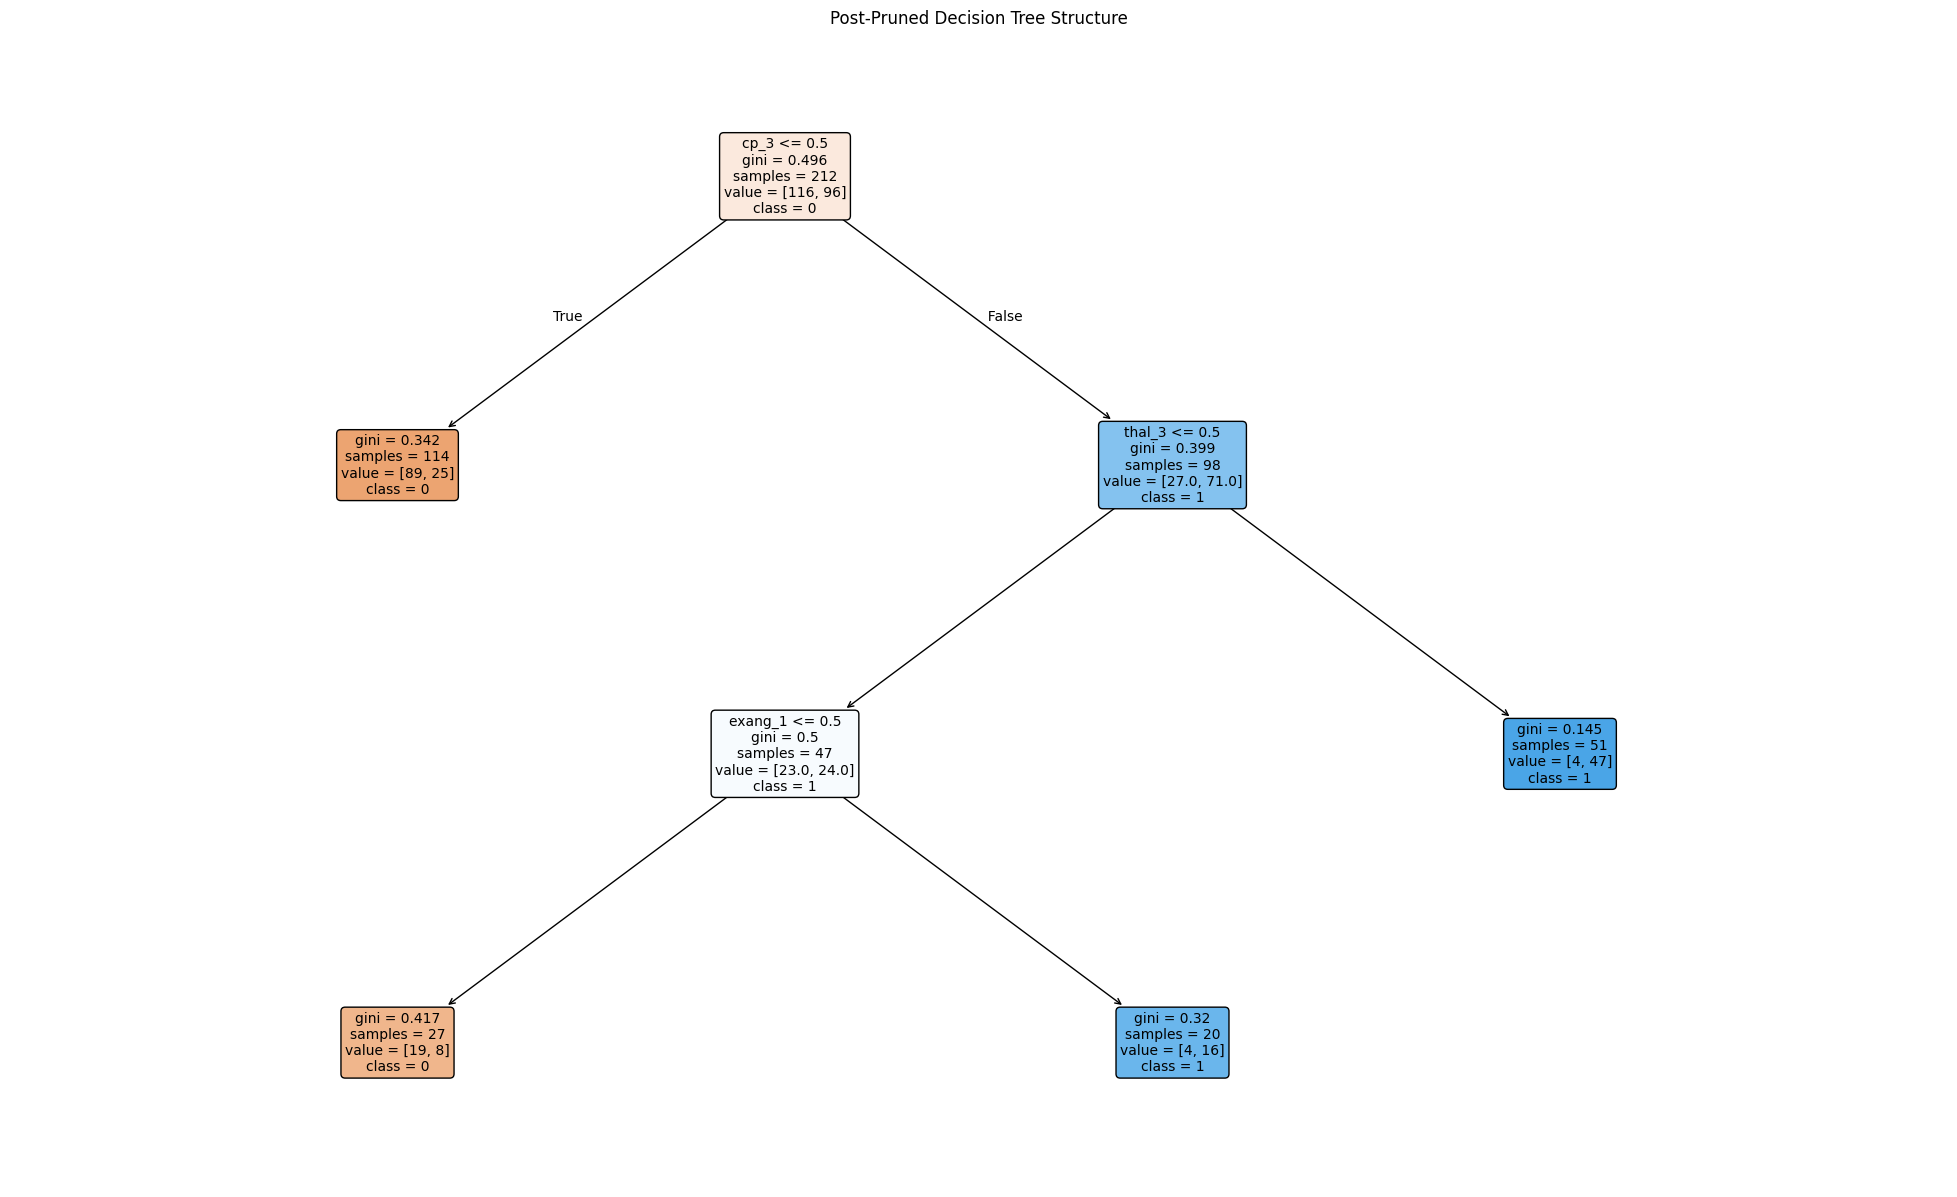

Post-Pruned Decision Tree visualization saved as post_pruned_decision_tree.png


In [8]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

# Get feature names for interpretability
feature_names = X_encoded.columns.tolist()
class_names = [str(cls) for cls in dt_post_pruned_classifier.classes_]

plt.figure(figsize=(25, 15))
plot_tree(dt_post_pruned_classifier,
          feature_names=feature_names,
          class_names=class_names,
          filled=True,
          rounded=True,
          fontsize=10)
plt.title("Post-Pruned Decision Tree Structure")
plt.savefig("post_pruned_decision_tree.png", dpi=300)
plt.show()

print("Post-Pruned Decision Tree visualization saved as post_pruned_decision_tree.png")

Top 10 Most Important Features:
cp_3        0.656240
thal_3      0.201527
exang_1     0.142233
age         0.000000
thalach     0.000000
chol        0.000000
trestbps    0.000000
oldpeak     0.000000
cp_2        0.000000
fbs_1       0.000000
dtype: float64


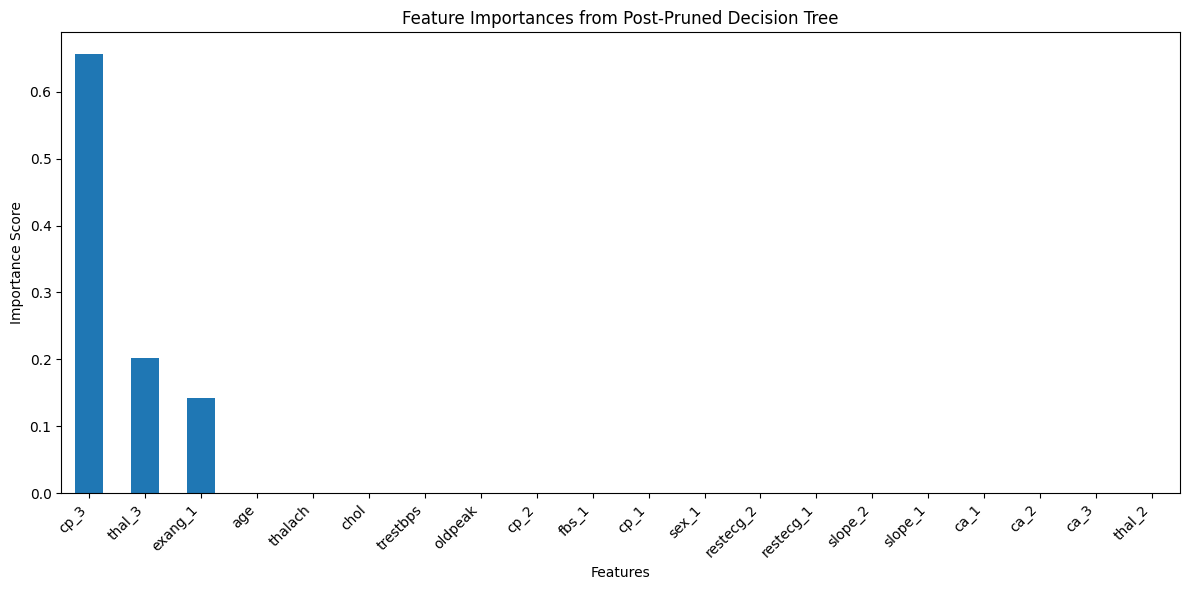

In [9]:
import pandas as pd
import matplotlib.pyplot as plt

# 1. Extract feature importances from the dt_post_pruned_classifier
feature_importances = dt_post_pruned_classifier.feature_importances_

# 2. Create a Pandas Series to store feature names and their corresponding importances
feature_names = X_encoded.columns
feature_importance_series = pd.Series(feature_importances, index=feature_names)

# 3. Sort the features by importance in descending order
sorted_feature_importances = feature_importance_series.sort_values(ascending=False)

# 4. Display the top N most important features and their scores
print("Top 10 Most Important Features:")
print(sorted_feature_importances.head(10))

# 5. Create a bar plot to visualize the feature importances
plt.figure(figsize=(12, 6))
sorted_feature_importances.plot(kind='bar')
plt.title('Feature Importances from Post-Pruned Decision Tree')
plt.xlabel('Features')
plt.ylabel('Importance Score')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()
